In [18]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
all_results = []
for f in Path('../auditory_brain_dnn/results').rglob('*df_output.pkl'):
    if ('base' in str(f)) and ('st' not in str(f)) and ('comp' in str(f)):
        model = f.parts[-3]
        layer = int(f.parts[-2].split('_')[2].split('-')[-1])
        df = pd.read_pickle(f)
        df['layer'] = layer
        df['model'] = model
        all_results.append(df)

In [46]:
df = pd.DataFrame(all_results)
df = df.loc[df['model'].apply(lambda x: '-as' not in x)]
df['model'] = df['model'].apply(lambda x: {'mel256-ec-base': 'Mixture', 'mel256-ec-base-ll': 'Speech', 'mel256-ec-base-fma': 'Music'}[x])
rename_comp = {'lowfreq': 'Low freq', 'highfreq': 'High freq', 'envsounds': 'Broadband'}
df['comp'] = df['comp'].apply(lambda x: rename_comp[x] if x in rename_comp else x)
df['layer'] = df['layer']+1

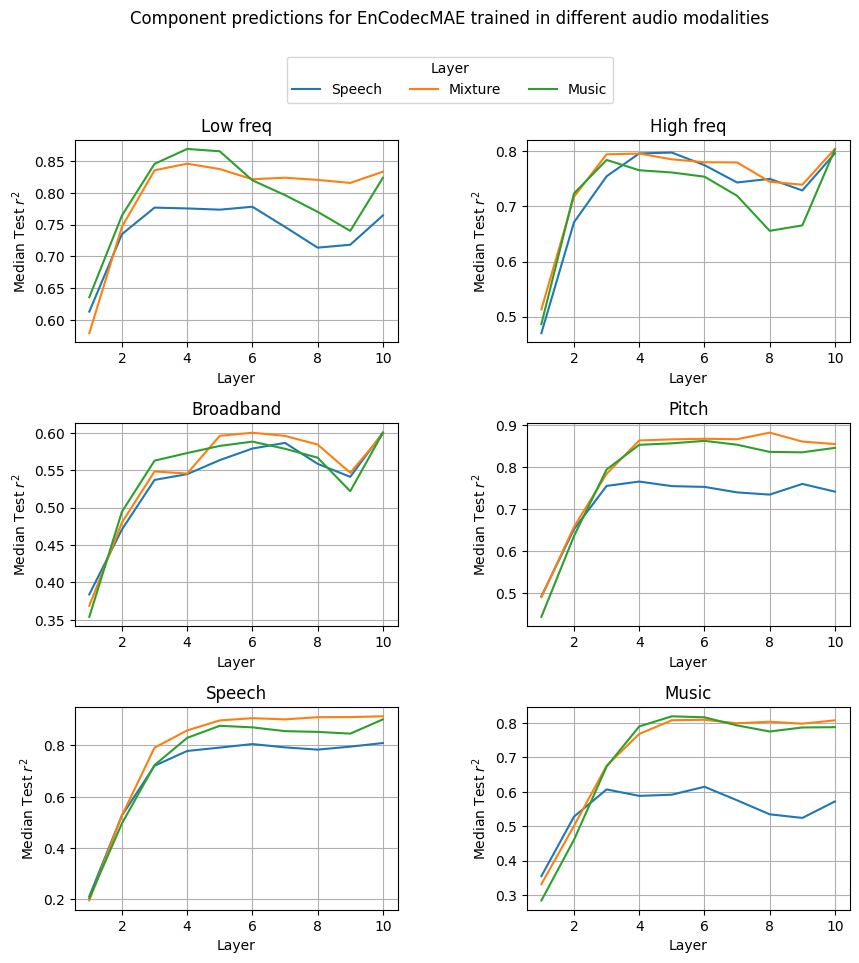

In [47]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
fig.suptitle('Component predictions for EnCodecMAE trained in different audio modalities',y=1.01)

for i, comp in enumerate(df['comp'].unique()):
    sns.lineplot(data=df.loc[(df['comp']==comp)],
                 x='layer',
                 y='median_r2_test',
                 hue='model',
                 ax=ax[i // 2, i % 2],
                 legend=True)
    ax[i // 2, i % 2].set_title(comp.capitalize())
    
# Collect handles and labels for the legend from one of the plots
handles, labels = ax[0, 0].get_legend_handles_labels()

# Check if labels are present
if labels:
    # Add a single legend to the figure
    fig.legend(handles, labels, loc='upper center', ncol=max(len(labels), 1), bbox_to_anchor=(0.5, 0.97), title='Layer')
else:
    print("No labels found for the legend")

# Set the same y-axis limits for all axes
ylim = (df['median_r2_test'].min()-0.1, df['median_r2_test'].max()+0.1)

for axes in ax.flat:
    axes.grid('on')
    axes.get_legend().remove()
    axes.set_xlabel('Layer')
    axes.set_ylabel('Median Test $r^2$')

# Adjust layout to make space for the legend and prevent overlapping
plt.subplots_adjust(top=0.88, hspace=0.4, wspace=0.4)

# Display the plot
plt.show()

In [14]:
components = ['Low freq','High freq','Broadband','Pitch','Speech','Music']

all_results = pd.concat(all_results)
all_results['component_name'] = all_results['voxel_id'].apply(lambda x: components[x])

<Axes: xlabel='layer', ylabel='median_r2_test'>

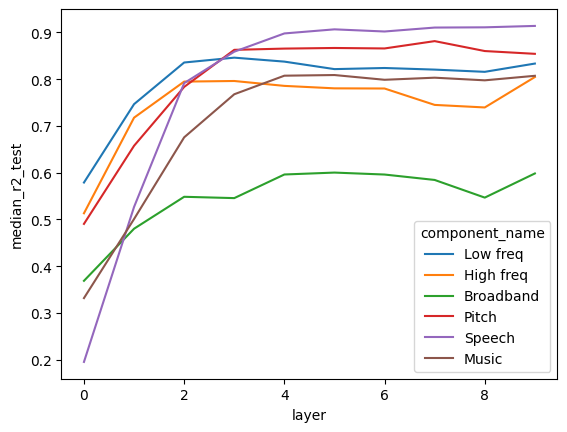

In [15]:
sns.lineplot(all_results.loc[all_results['model']=='mel256-ec-base'], x='layer', y='median_r2_test', hue='component_name')

<Axes: xlabel='layer', ylabel='median_r2_test'>

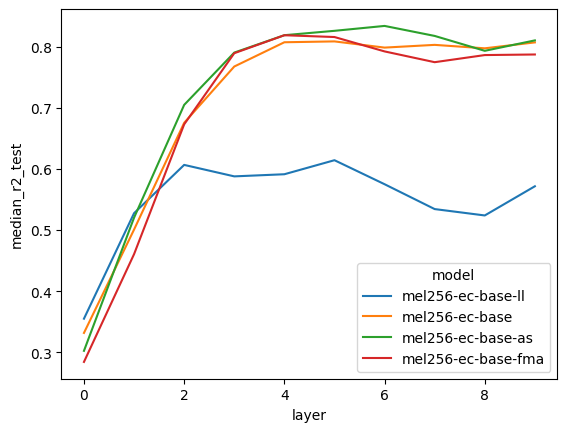

In [16]:
sns.lineplot(all_results.loc[all_results['component_name']=='Music'], x='layer', y='median_r2_test', hue='model')

<Axes: xlabel='layer', ylabel='median_r2_test'>

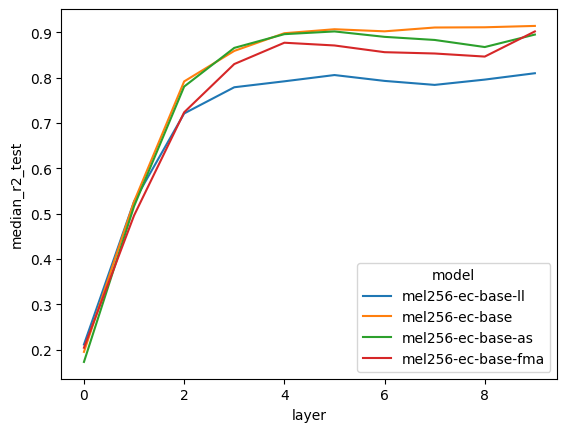

In [29]:
sns.lineplot(all_results.loc[all_results['component_name']=='Speech'], x='layer', y='median_r2_test', hue='model')